
# CAR PURCHASE AMOUNT (DOLLAR) PREDICTION USING ANNs



develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

## LIBRARIES IMPORT


In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

## IMPORT DATASET

In [24]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [25]:
car_df.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## VISUALIZE DATASET

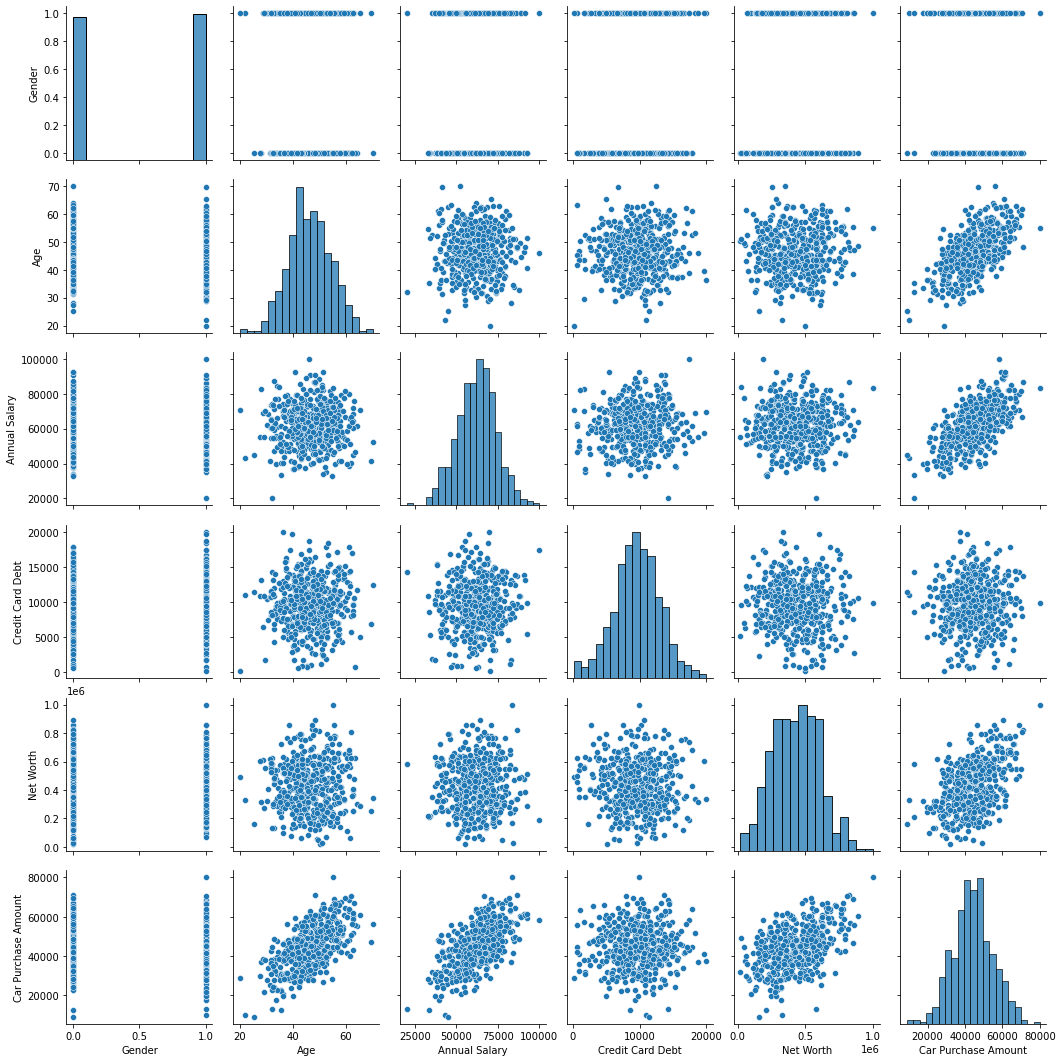

In [26]:
sns.pairplot(car_df);

## DATA PREPROCESSING

In [27]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [28]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [29]:
y = car_df['Car Purchase Amount']
y.shape

(500,)

In [30]:
scaler_x.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [31]:
scaler_x.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [32]:
print(X_scaled)

[[0.         0.4370344  0.53515116 0.57836085 0.22342985]
 [0.         0.41741247 0.58308616 0.476028   0.52140195]
 [1.         0.46305795 0.42248189 0.55579674 0.63108896]
 ...
 [1.         0.67886994 0.61110973 0.52822145 0.75972584]
 [1.         0.78321017 0.37264988 0.69914746 0.3243129 ]
 [1.         0.53462305 0.51713347 0.46690159 0.45198622]]


In [33]:
y = y.values.reshape(-1,1)

In [34]:
y.shape

(500, 1)

In [35]:
y[:10]

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601]])

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## TRAINING THE MODEL

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [38]:
model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_5 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [40]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)


Train on 300 samples, validate on 75 samples
Epoch 1/20
300/300 [==============================] - 0s 1ms/step - loss: 0.2687 - val_loss: 0.1236
Epoch 2/20
300/300 [==============================] - 0s 100us/step - loss: 0.0667 - val_loss: 0.0313
Epoch 3/20
300/300 [==============================] - 0s 90us/step - loss: 0.0207 - val_loss: 0.0226
Epoch 4/20
300/300 [==============================] - 0s 77us/step - loss: 0.0185 - val_loss: 0.0174
Epoch 5/20
300/300 [==============================] - 0s 73us/step - loss: 0.0134 - val_loss: 0.0135
Epoch 6/20
300/300 [==============================] - 0s 108us/step - loss: 0.0113 - val_loss: 0.0117
Epoch 7/20
300/300 [==============================] - 0s 99us/step - loss: 0.0097 - val_loss: 0.0102
Epoch 8/20
300/300 [==============================] - 0s 96us/step - loss: 0.0085 - val_loss: 0.0092
Epoch 9/20
300/300 [==============================] - 0s 93us/step - loss: 0.0074 - val_loss: 0.0082
Epoch 10/20
300/300 [========================

## EVALUATING THE MODEL 

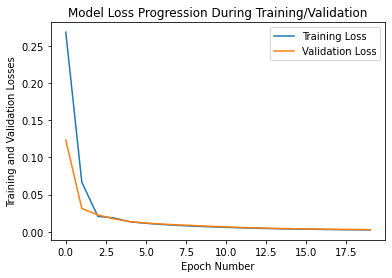

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [42]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth 

# ***(Note that input data must be normalized)***

X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
#X_test_sample = np.array([[1, 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

y_predict_sample = model.predict(X_test_sample)

print('Expected Purchase Amount=', y_predict_sample[0][0])
y_predict_sample_orig = scaler_y.inverse_transform(y_predict_sample)
print('Expected Purchase Amount=', y_predict_sample_orig[0][0])

Expected Purchase Amount= 0.4221285
Expected Purchase Amount= 38971.12
